# CS240 Analysis

In [1]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

#### We need pandas, numpy, thinkstats2, and thinkplot to present the data. Then using read_csv we read basketball_players.csv.
# Section 2

In [5]:
basketball_players_df = pd.read_csv("basketball_players.csv") #for reading csv file.
basketball_players_df.sample(5) #gives 5 sample inside of "basketball_players.csv" file.

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
5634,hillmda01,1974,1,INA,ABA,81,0,2603,1124,296,...,30,24,68,146,73,51,35,0,0,NaN
6712,greenst01,1977,1,IND,NBA,44,0,449,151,31,...,0,0,0,0,0,0,0,0,0,NaN
4341,cartege01,1971,2,CAR,ABA,29,0,738,479,51,...,0,0,0,0,0,0,0,0,0,NaN
18538,okafoem01,2005,1,CHA,NBA,26,0,874,344,94,...,0,0,0,0,0,0,0,0,0,NaN
9393,hubbaph01,1985,1,CLE,NBA,23,0,640,262,48,...,0,0,0,0,0,0,0,0,0,NaN


### I eliminate 0 minute values by lambda and apply() filter, then create new dataframe df.

In [42]:
newdataframe=basketball_players_df 
minutes_0 = lambda minute: float(minute)>0 #the filter
newdataframe["minutes_0"] = newdataframe.minutes.apply(minutes_0)
df = newdataframe[newdataframe.minutes_0]

# Section 3
### I show the statistics of the data by mean(), std(), var(), min(), max() for each variable.

In [43]:
mean_minutes=df.minutes.mean()
mean_points=df.points.mean()
print ("Mean Of Minutes= ")+str(mean_minutes)
print ("Mean Of Points= ")+str(mean_points)

Mean Of Minutes= 1242.81797806
Mean Of Points= 534.965045303


In [44]:
std_minutes=df.minutes.std() 
std_points=df.points.std()
print ("Standard Deviation Of Minutes= ")+str(std_minutes)
print ("Standard Deviation Of Points= ")+str(std_points)

Standart Deviation Of Minutes= 968.337482692
Standart Deviation Of Points= 513.892497367


In [45]:
variance_minutes=df.minutes.var()
variance_points=df.points.var()
print ("Variance Of Minutes= ")+str(variance_minutes)
print ("Variance Of Points= ")+str(variance_points)

Variance Of Minutes= 937677.480386
Variance Of Points= 264085.49885


In [46]:
max_minutes=df.minutes.max()
max_points=df.points.max()
print ("Maximum Value Of Minutes= ")+str(max_minutes)
print ("Maximum Value Of Points= ")+str(max_points)

Maximum Value Of Minutes= 3882
Maximum Value Of Points= 4029


In [47]:
min_minutes=df.minutes.min()
min_points=df.points.min()
print ("Minimum Value Of Minutes= ")+str(min_minutes)
print ("Minimum Value Of Points= ")+str(min_points)

Minimum Value Of Minutes= 1
Minimum Value Of Points= 0


### I use Pmf(), Hist(), and Cdf() from thinkstats2 to plot the Histograms, PMF's, CDF's of variables. 


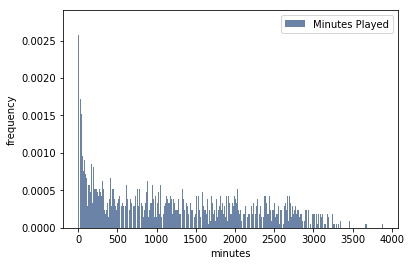

In [48]:
pmf_minutes = thinkstats2.Pmf(df.minutes, label='Minutes Played')
pmf_points = thinkstats2.Pmf(df.points, label='Points For a Season')
hist_minutes=thinkplot.Hist(pmf_minutes)
thinkplot.Config(xlabel='minutes', ylabel='frequency')

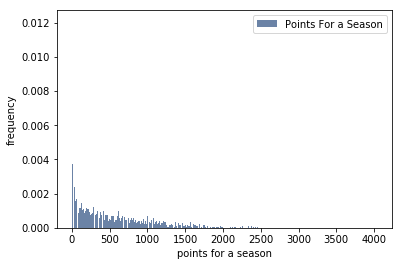

In [49]:
hist_points=thinkplot.Hist(pmf_points)
thinkplot.Config(xlabel='points for a season', ylabel='frequency')

### I use Pmf(), Hist(), and Cdf() from thinkstats2 to plot the Histograms, PMF's, CDF's of variables. 

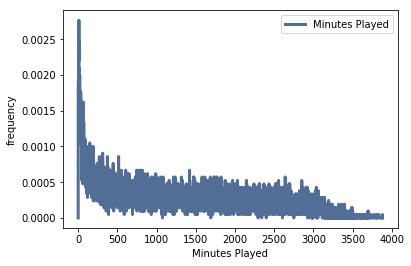

In [50]:
thinkplot.Pmf(pmf_minutes)
thinkplot.Config(xlabel='Minutes Played', ylabel='frequency')

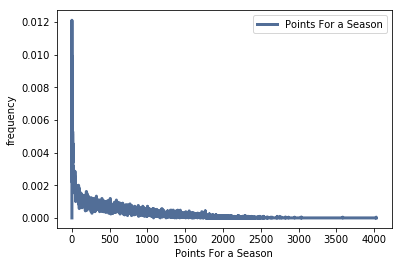

In [51]:
thinkplot.Pmf(pmf_points)
thinkplot.Config(xlabel='Points For a Season', ylabel='frequency')

### I use Pmf(), Hist(), and Cdf() from thinkstats2 to plot the Histograms, PMF's, CDF's of variables. 

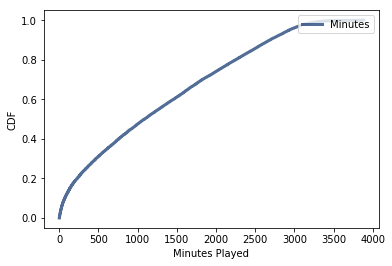

In [52]:
cdf_minutes = thinkstats2.Cdf(df.minutes, label='Minutes')
thinkplot.Cdf(cdf_minutes)
thinkplot.Config(xlabel='Minutes Played', ylabel='CDF')

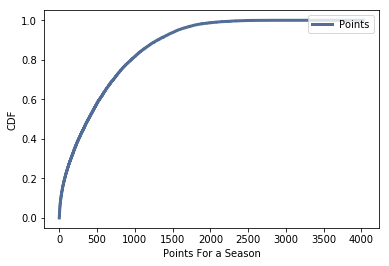

In [53]:
cdf_points = thinkstats2.Cdf(df.points, label='Points')
thinkplot.Cdf(cdf_points)
thinkplot.Config(xlabel='Points For a Season', ylabel='CDF')

# Section 4
### To plot CDF of point I divide data by 2000 to scale it down to the Exponential CDF and plot both.

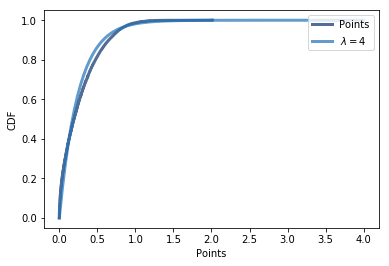

In [54]:
cdf_points = thinkstats2.Cdf(df.points/2000, label='Points')
thinkplot.Cdf(cdf_points)
xs, ps = thinkstats2.RenderExpoCdf(4,0, 4) #lamda, x limit1, x limit2
label = r'$\lambda=%g$' % 4
thinkplot.Plot(xs, ps, label=label)
thinkplot.Config(xlabel='Points', ylabel='CDF', loc='upper right')

### To plot CDF of minute I divide data by 1000 to scale it down to the Exponential CDF and plot both.

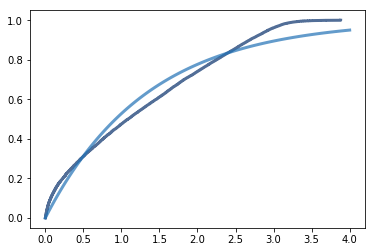

In [75]:
cdf_minutes = thinkstats2.Cdf(df.minutes/1000)
thinkplot.Cdf(cdf_minutes)
xs, ps = thinkstats2.RenderExpoCdf(0.75,0, 4) #lamda, x limit1, x limit2
label = r'$\lambda=%g$' % 0.75
thinkplot.Plot(xs, ps, label=label)

 # Section 5
### Predefined functions from thinkstats2 needed to plot scatter plot

In [56]:
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)
    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx
    return inter, slope
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

### Here, I get the scatter plot and linear squares fit line to show correlation.

correlation= 0.926690070729975


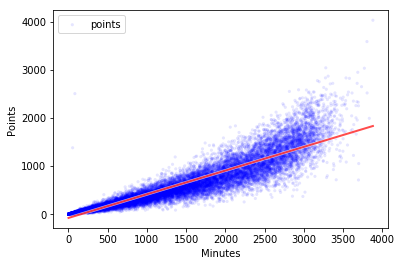

In [57]:
y,slope=LeastSquares(df.minutes, df.points) #slop and y intercept of line best fit
fit_xs,fit_ys=FitLine(df.minutes,y,slope) #the line
thinkplot.Scatter(df.minutes, df.points, color='blue', alpha=0.1, s=10) #scatter plot
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Minutes",ylabel='Points')
minute_points_corr=thinkstats2.Corr(df.minutes,df.points) #calculating Correlation
print "The Correlation of minute and point:",minute_points_corr

### To get the TS vs. Prob. plot get Absolute of Mean of points x Mean of minutes - each player's points x minute

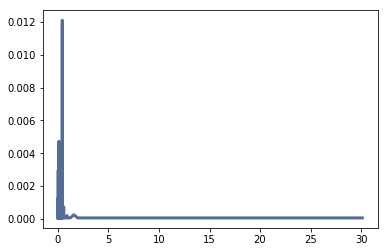

In [76]:
data_scaled=df.points*df.minutes #series of multiplied mins and points
ts_results=[]
for data in data_scaled:
    a=abs((df.points.mean()*df.minutes.mean())-data) #getting T.S for each player
    ts_results.append(a)
teststat=pd.Series(ts_results) #making ts list series
ts_pmf = thinkstats2.Pmf(teststat, label='T.S.') #plotting T.S
thinkplot.Plot(lol_pmf)


# Section 7:
### In conclusion, as shown 2 variables minute per season and points per season are correlated. Average of NBA player’s minute played is 1242.81 points. Average of NBA player’s points of a season is 534.96 points. Most minutes played in one season in the data is 3882 minutes, basically 64.7 hours in one season. Best points value in our data 4029 points for a season. We also found the 2 variables to be exponentially distributed and can be modeled with lambdas 4 and 0.75. We found the correlation to be 0. 926 which mean the 2 variables are much correlated. More minutes played means more points, generally. Finally, there is Right-Skewness of the points. Meaning that, for 0 to 1500 minutes, data points seem linearly increasing but when looking at the right tail of the plot the points start growing exponentially not linearly. Which means that if it was physically possible to play for example 10,000 minutes in a season, the points will grow exponentially, as shown by scatter plot.
